In [3]:
from concise.data import attract, encode

In [50]:
from plotnine import *

/home/avsec/bin/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
import numpy as np
import pandas as pd

In [42]:
pwm_list = attract.get_pwm_list(attract.get_metadata().PWM_id.unique())
pwm_list_e = encode.get_pwm_list(encode.get_metadata().motif_name.unique())

In [43]:
pwm_list[0].pwm.shape

(6, 4)

In [44]:
pwmc = np.concatenate([pwm.pwm for pwm in pwm_list], axis=0)
pwmce = np.concatenate([pwm.pwm for pwm in pwm_list_e], axis=0)

In [46]:
dfa = pd.DataFrame(pwmc, columns = ["A", "C", "G", "T"])
dfae = pd.DataFrame(pwmce, columns = ["A", "C", "G", "T"])

In [48]:
dfa = pd.melt(dfa, var_name="base")
dfa["db"] = "attract"
dfae = pd.melt(dfae, var_name="base")
dfae["db"] = "encode"
df = pd.concat([dfa, dfae])

In [49]:
df

,base,value,db
0,A,0.0096,attract
1,A,0.9711,attract
2,A,0.9711,attract
...,...,...,...
107453,T,0.0500,encode
107454,T,0.0500,encode
107455,T,0.0500,encode


In [67]:
df.groupby("db").count()

,base,value
db,,
attract,44872,44872
encode,107456,107456


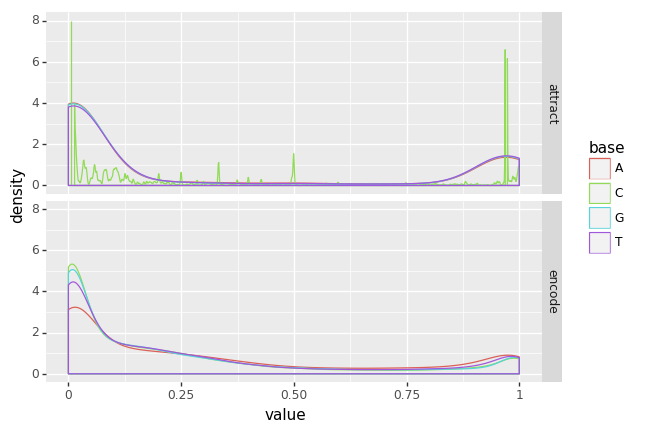

<ggplot: (-9223363275156352708)>

In [62]:
ggplot(aes(x = "value", color = "base"), df) + \
    geom_density() + \
    facet_grid('db~.') + \
    ylim((0, 8))